In [1]:
import os
from tqdm import tqdm
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv.imread("../crack_image/side_A_B.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

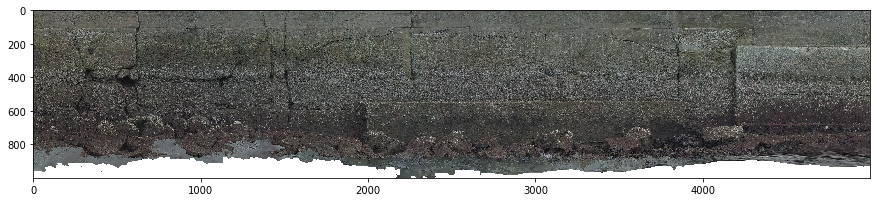

In [3]:
fig = plt.figure(figsize=(15, 5))
plt.imshow(img[500:1500, 2000:7000, :])
plt.show()

In [4]:
img.shape

(2144, 62392, 3)

In [5]:
mask = np.zeros((2144, 62392), dtype=np.float32)

In [6]:
mask = np.sum(img, axis=2) / 3

In [7]:
mask[mask == 255] = 0
mask[mask != 0] = 1

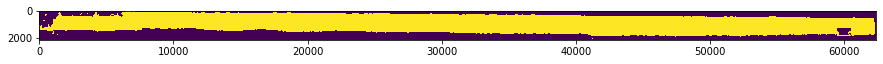

In [8]:

fig = plt.figure(figsize=(15, 5))
plt.imshow(mask)
plt.show()

In [9]:
def randomCrop(img, mask, width, height):
    assert img.shape[0] >= height
    assert img.shape[1] >= width
    assert img.shape[0] == mask.shape[0]
    assert img.shape[1] == mask.shape[1]
    x = np.random.randint(0, img.shape[1] - width)
    y = np.random.randint(0, img.shape[0] - height)
    img = img[y:y+height, x:x+width]
    mask = mask[y:y+height, x:x+width]
    return img, mask

def export_image(img, mask, image_name, width=448, height=448,
                 export_path='../crack_image/inference/'):
    crop, crop_mask = randomCrop(img, mask, width, height)
    image_path = export_path + image_name
    n = crop_mask[crop_mask != 0].shape[0]
    if n <= width * height * 0.9:
        return 0
    else:
        cv.imwrite(image_path, cv.cvtColor(crop, cv.COLOR_RGB2BGR))  #, cv.cvtColor(img, cv.COLOR_RGB2BGR))
        return 1


In [10]:
crop, crop_mask = randomCrop(img, mask, 448, 448)

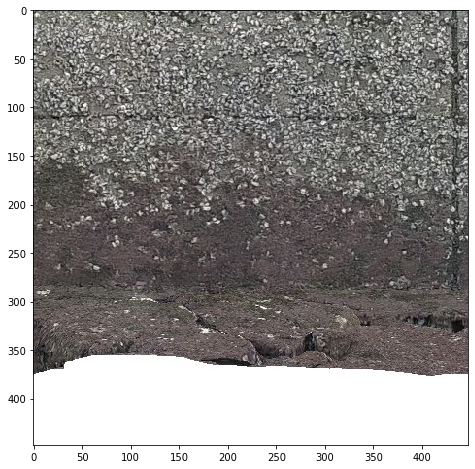

In [11]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(crop)
plt.show()

In [13]:
index = 1
N = 5000
while index <= N:
    
    result = export_image(img, mask, "%05d.jpg" % index)
    if result == 1:
        index += 1
        if index % 500 == 0:
            print("%05d/%05d" % (index, N))
    

00500/05000
01000/05000
01500/05000
02000/05000
02500/05000
03000/05000
03500/05000
04000/05000
04500/05000
05000/05000


In [1]:
n = crop_mask[crop_mask == 1].shape[0]

NameError: name 'crop_mask' is not defined

In [41]:

n <= 448 * 448 * 0.9

False

In [45]:
cv.imwrite('test.jpg', crop)

True